In [1]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
import scipy
import scipy.fftpack
import pylab
from scipy import pi
%config InlineBackend.figure_format = 'retina'

from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [2]:
exp1 = np.fromfile('/Volumes/platonov/Figures+data//osc.dat',dtype=float,count=-1, sep=" ")
exp2 = np.fromfile('/Volumes/platonov/Figures+data//pha',dtype=float,count=-1, sep=" ")
exp3 = np.fromfile('/Volumes/platonov/Figures+data//amp',dtype=float,count=-1, sep=" ")
exp4 = np.fromfile('/Volumes/platonov/Figures+data//qpc.dat',dtype=float,count=-1, sep=" ")
exp5 = np.fromfile('/Volumes/platonov/Figures+data//fft_r',dtype=float,count=-1, sep=" ")
exp6 = np.fromfile('/Volumes/platonov/Figures+data//fft_f',dtype=float,count=-1, sep=" ")
#exp61 = np.fromfile('D://fft_r1',dtype=float,count=-1, sep=" ")
#exp62 = np.fromfile('D://fft_r2',dtype=float,count=-1, sep=" ")
#exp63 = np.fromfile('D://fft_r3',dtype=float,count=-1, sep=" ")
exp7 = np.fromfile('/Volumes/platonov/Figures+data//fit1',dtype=float,count=-1, sep=" ")
exp8 = np.fromfile('/Volumes/platonov/Figures+data//dddd.dat',dtype=float,count=-1, sep=" ")

In [3]:
exp4 = np.reshape(exp4, (-1, 3))
exp4=np.transpose(exp4)
exp7 = np.reshape(exp7, (-1, 1))
exp7=np.transpose(exp7)
exp8 = np.reshape(exp8, (501, 221))
#exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
exp8=np.transpose(exp8)

In [4]:
exp3.shape

(201,)

In [5]:
exp1 = np.reshape(exp1, (251, 1001))
exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
exp1=np.transpose(exp1)
exp2 = np.reshape(exp2, (-1, 201))
exp3 = np.reshape(exp3, (-1,201))
exp5 = np.reshape(exp5, (-1, 161))
exp6 = np.reshape(exp6, (-1,161))
#exp61 = np.reshape(exp61, (-1,161))
#exp62 = np.reshape(exp62, (-1,161))
#exp63 = np.reshape(exp63, (-1,161))


ValueError: cannot reshape array of size 121 into shape (201)

(-1.8, -0.8)

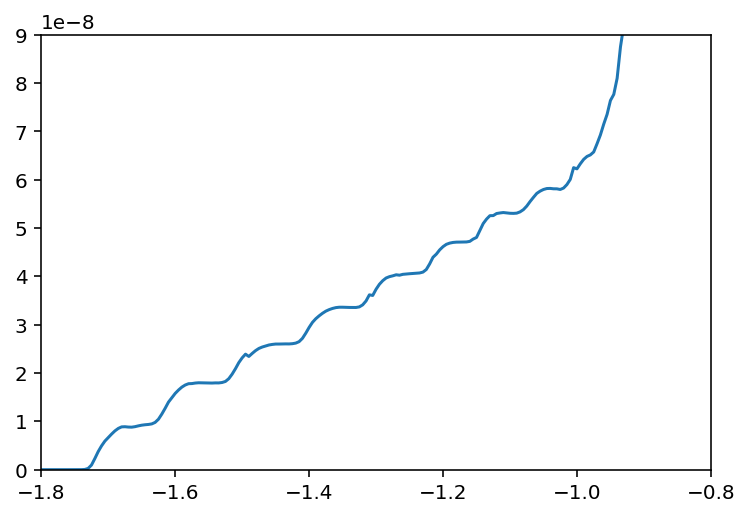

In [6]:
plt.plot(exp4[0],exp4[1])
plt.ylim(0,9E-8)
plt.xlim(-1.8,-0.8)

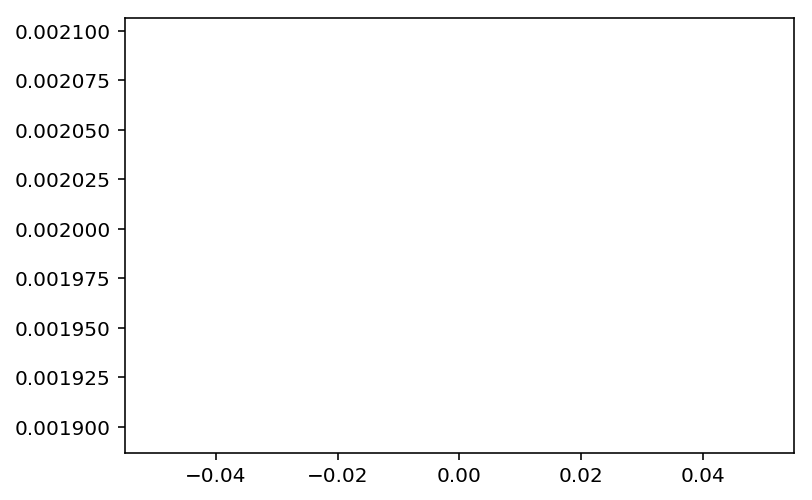

In [7]:
plt.plot(exp3[0])

In [8]:
for i in range(251):
    dat=baseline_als(exp1[i],10000,0.01,100)
    exp1[i]=exp1[i]-dat

In [9]:
np.savetxt('2D.txt', exp1, delimiter=' ')

In [23]:
new2=exp1[50:200,0:400]

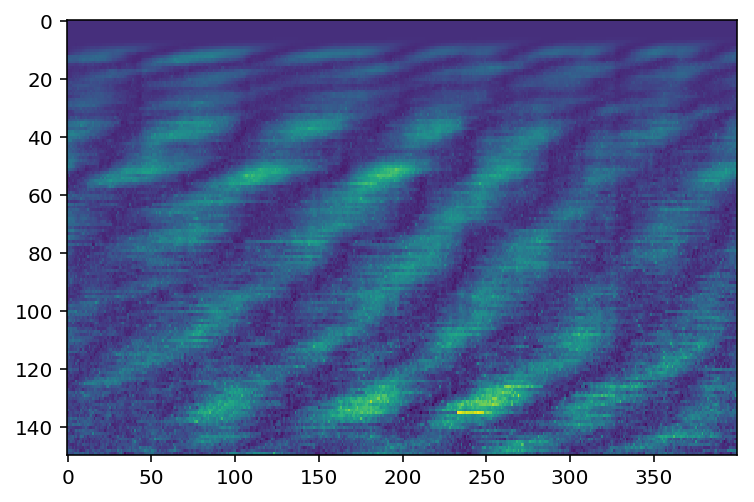

In [24]:
plt.imshow(new2, aspect='auto')

In [25]:
#for i in range(221):
#    dat=baseline_als(exp8[i],100,0.01,100)
#    exp8[i]=exp8[i]-dat

In [26]:
x=np.linspace(-2., -0.8, num=251)
x2=np.linspace(-2, 0, num=1001)
x3=np.linspace(-2, 0, num=1001)
x4=np.linspace(-1.8, -0.8, num=201)
x5=np.linspace(-1.76, -0.8, num=201)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:49: RankWarning: Polyfit may be poorly conditioned


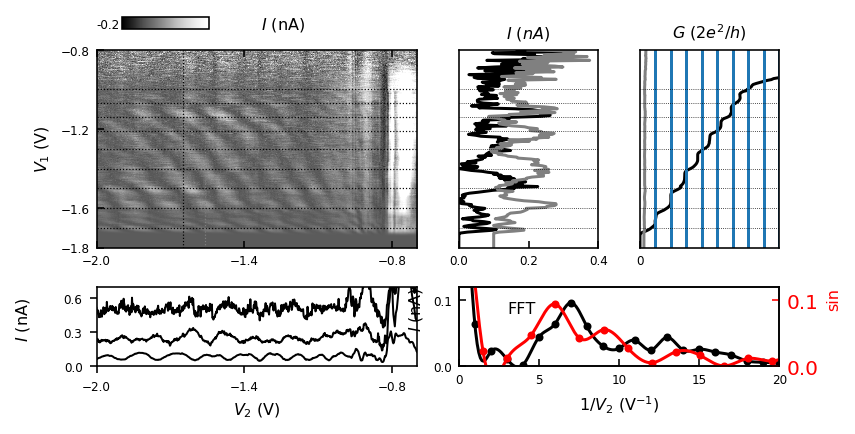

In [40]:
import matplotlib.gridspec as gridspec
#plt.rc('font', family='serif')


fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs[0:2, 0:2])

xt=np.linspace(-2.0, -0.0, num=4)

cf=plt.imshow(exp1*1E9, interpolation='none', aspect='auto',cmap='Greys_r',vmin=-0.2, vmax=0.5, extent=[-2.0,0,-.800,-2.000])




from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)

#plt.text(-0.8, -1.1, 'No cavity', rotation=90,fontsize=8)
#plt.text(-1.8,-1.48, 'Determenistic cavity', rotation=0,fontsize=8)
#plt.text(-1.3,-1.1, 'Chaotic cavity', rotation=0,fontsize=8)

plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.6)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.6)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.6)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.6)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.6)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.6)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.6)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.6)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.6)
plt.axvline(x=x2[175], color='k', linestyle='dotted',lw=0.6)
plt.axvline(x=x2[220], color='gray', linestyle='dotted',lw=0.6)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)

x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


coefficients = numpy.polyfit(x, y, 3)
polynomial = numpy.poly1d(coefficients)
xs=np.linspace(-1.53,-1.15,4000)
ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.2,-1.6,-1.8],fontsize=6)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=8)
plt.xticks(np.arange(xt.min(), xt.max(),0.6),fontsize=6)
plt.ylim(-1.8,-0.8)
plt.xlim(-2,-0.7)
#plt.title('Concave lense at 1st plateau') 

###########################################################
#COLORBAR

cbaxes = fig.add_axes([0.03, 0.917, 0.1, 0.02]) 

plt.text(-0.3, 0, '-0.2',color='k', rotation=0,fontsize=6)
#plt.text(1.1, 0, '3',color='k', rotation=0,fontsize=6)
plt.text(1.6, 0, '$I$ (nA)',color='k', rotation=0,fontsize=8)
cbar=plt.colorbar(cax=cbaxes, ticks=[], orientation='horizontal',label='')
#cb=plt.colorbar(ticks=[0, 0.3, 0.7],label='I', orientation='horizontal') 
#plt.colorbar()
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
#cb.ax.xaxis.set_ticks_position('top')
#cb.ax.xaxis.set_label_position('top')
 
#############################################################
import matplotlib.patches as patches
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.72), 6, 0.1,
#        alpha=0.2, facecolor="#000080"
#    ))
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.62), 6, 0.1,
#        alpha=0.2,facecolor="#4682B4"
#    ))
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.52), 6, 0.1,
#        alpha=0.2, facecolor="#00BFFF"
#    ))


ax2 = plt.subplot(gs[2,0:2])

#plt.plot(x2,exp1[84]*1E9+0.2, 'k',lw=1)
plt.plot(x2,(exp1[62]+exp1[61]+exp1[60]+exp1[59]+exp1[58])/5*1E9+0.05, 'k',lw=1)
#plt.plot(x2,exp1[102]*1E9+0.4, 'k',lw=1)
#plt.plot(x2,exp1[122]*1E9+0.6, 'k',lw=1)
plt.plot(x2,(exp1[142]+exp1[141]+exp1[140]+exp1[139]+exp1[138])/5*1E9+0.2, 'k',lw=1)
plt.plot(x2,(exp1[230]+exp1[231]+exp1[232]+exp1[229]+exp1[228])/5*1E9+0.4, 'k',lw=1)
plt.xlim(-2,-0.7)
xt=np.linspace(-2, -0.7, num=4)
plt.xticks(np.arange(xt.min(), xt.max(),0.6),fontsize=6)
#plt.annotate('3rd', xy=(-1.8,0.7), xytext=(-0.6,0.5), color='#00BFFF',fontsize=8)

#plt.annotate('2nd', xy=(-1.8,0.7), xytext=(-0.6,0.25),color='#4682B4',fontsize=8)
#plt.annotate('1st', xy=(-1.8,0.7), xytext=(-0.6,0.),color='#000080',fontsize=8)
#plt.annotate('$\overline{I}$', xy=(-1.5,0.6), xytext=(-1.5,0.),color='k',arrowprops=dict(arrowstyle="<->",
#                            connectionstyle="arc3"))
plt.xlabel("$V_{2}$ (V)",color='k',fontsize=8)

plt.ylabel("$I$ (nA)", x=-1,fontsize=8)
ax = plt.gca() 
ax.yaxis.set_label_coords(-0.2, 0.6) 
#plt.xlim(0,550)
plt.ylim(0,0.7)
yt=np.linspace(0, 0.7, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),0.3),fontsize=6)
#xf=np.linspace(-0.8, -1.8, num=300)
#plt.plot(xf,exp7[0],'-',lw=5)
#ax2.add_patch(patches.Rectangle(
##        (-2, -1.72), 600, 0.1,
 #       alpha=0.2, facecolor="#000080"
#   ))
#ax2.add_patch(patches.Rectangle(
#        (-2, -1.62), 600, 0.1,
#        alpha=0.2,facecolor="#4682B4"
#    ))
#ax2.add_patch(patches.Rectangle(
#        (-2, -1.52), 600, 0.1,
#        alpha=0.2, facecolor="#00BFFF"
#    ))

#ax3 = plt.subplot(gs[0:2:, 3])


#plt.plot(exp3*0.0079*1000,x5,'k')

#plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.4)
#plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
#xt=np.linspace(20, 200, num=4)
#plt.xticks(np.arange(xt.min(), xt.max(),80),fontsize=6)
#plt.title('$A$ (pA)', color='black',fontsize=8)
#plt.text(85, -1.3, '(4)',color='k', rotation=0,fontsize=8)
#plt.xlabel("$V_2$ (V)")
#plt.xlabel("$I$ (nA)")
#plt.ylim(-1.8,-0.8)
#plt.xlim(0,120)



ax4 = plt.subplot(gs[0:2:, 3])
x6=np.linspace(-2., -0.8, num=251)
plt.plot(exp4[1]*1E9/9,exp4[0],'k')
plt.plot(test2/400*1E9+0.25,x6,'gray')
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
xt=np.linspace(0, 70, num=4)
plt.title('$G$ ($2e^2/h$)', color='black',fontsize=8)
plt.axvline(x=1)
plt.axvline(x=2)
plt.axvline(x=3)
plt.axvline(x=4)
plt.axvline(x=5)
plt.axvline(x=6)
plt.axvline(x=7)
plt.axvline(x=8)
plt.axvline(x=9)

plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.4)
plt.xticks(np.arange(xt.min(), xt.max(),30),fontsize=6)
#plt.annotate('1st', xy=(2,-1.72), xytext=(2.1,-1.70),color='black')
#plt.annotate('2nd', xy=(2,-1.62), xytext=(2.1,-1.59),color='blue')
#plt.annotate('3rd', xy=(2,-1.52), xytext=(2.1,-1.48),color='red')
plt.xlim(0,9)
plt.ylim(-1.8,-0.8)
#ax4.add_patch(patches.Rectangle(
#        (-2, -1.7), 600, 0.1,
#        alpha=0.2, facecolor="#000080"
#    ))
#ax4.add_patch(patches.Rectangle(
#        (-2, -1.6), 600, 0.1,
#        alpha=0.2,facecolor="#4682B4"
#    ))
#ax4.add_patch(patches.Rectangle(
#        (-2, -1.5), 600, 0.1,
#        alpha=0.2, facecolor="#00BFFF"
#    ))




ax4 = plt.subplot(gs[0:2:, 2])


x6=np.linspace(-2., -0.8, num=251)
plt.plot((exp1[:,170]+exp1[:,171]+exp1[:,172]+exp1[:,173]+exp1[:,174]+exp1[:,175])/5*1E9,x6,'k')
plt.plot((exp1[:,220]+exp1[:,221]+exp1[:,222]+exp1[:,223]+exp1[:,224]+exp1[:,225])/5*1E9+0.1,x6,'gray')

plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
xt=np.linspace(0, 0.5, num=4)
#plt.text(1, -0.95, '(2)',color='k', rotation=0,fontsize=8)
plt.title('$I$ ($nA$)', color='black',fontsize=8)
plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.4)
plt.xticks(np.arange(xt.min(), xt.max(),0.2),fontsize=6)

# P.arrow( x, y, dx, dy, **kwargs )


#plt.annotate('1st', xy=(2,-1.72), xytext=(2,-1.72),color='#000080',fontsize=8)
#plt.annotate('2nd', xy=(2,-1.62), xytext=(2,-1.61),color='#4682B4',fontsize=8)
#plt.annotate('3rd', xy=(2,-1.52), xytext=(2,-1.5),color='#00BFFF',fontsize=8)

#plt.xlabel("$V_2$ (V)")
#plt.xlabel("$I$ (nA)")
plt.xlim(-0.0,0.4)
plt.ylim(-1.8,-0.8)

#ax4.add_patch(patches.Rectangle(
#        (-2, -1.7), 600, 0.1,
#        alpha=0.2, facecolor="#000080"
#    ))
#ax4.add_patch(patches.Rectangle(
#        (-2, -1.6), 600, 0.1,
#        alpha=0.2,facecolor="#4682B4"
#    ))
#ax4.add_patch(patches.Rectangle(
#        (-2, -1.5), 600, 0.1,
#        alpha=0.2, facecolor="#00BFFF"
#    ))

ax5 = plt.subplot(gs[2,2:4])

#fft2d = np.fromfile('D://fft2d',dtype=float,count=-1, sep=" ")
#fft2d = np.reshape(fft2d, (150, 400))
#y1=np.linspace(-2, -1, num=500)
#y2=np.linspace(-2, -1, num=500)
#y3=np.linspace(-2, -1, num=500)

#x6
#fft2 = np.fft.fft(exp1[:,220])
#F_mag = np.abs(np.fft.fftshift(fft2))
#n = exp1[:,220].size
#timestep = exp1[2,220]-exp1[1,220]
#xx = np.fft.fftfreq(n, d=timestep)

#plt.plot(xx,ff2)

#x2
#exp1[62]
#plt.imshow(fft2d,cmap='Greys_r',aspect='auto',extent=[-280,280,-260,260],vmax=-13,vmin=-20,interpolation='nearest')
#plt.colorbar()
#plt.xlim(-100,100)
plt.xlabel("$1/V_2$ (V$^{-1}$)", color='k',fontsize=8)
plt.ylabel("$1/V_1$ (V$^{-1}$)", color='k',fontsize=8)
#plt.ylim(-100,100)
plt.tick_params(direction='in')
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
xy=np.linspace(-2, -1, num=500)
y1 = abs(scipy.fft(exp1[62,0:500]))
#y2 = abs(scipy.fft(exp1[95,0:500]))
#y3 = abs(scipy.fft(exp1[105,0:500]))
n = xy.size
timestep = xy[2]-xy[1]
xx = np.fft.fftfreq(n, d=timestep)

from scipy.interpolate import interp1d
f2 = interp1d(xx, 2*y1*0.0079*1E12/1000, kind='cubic')
xx2=np.linspace(np.min(xx),np.max(xx),5000)
plt.plot(xx2,f2(xx2),'-k')
plt.plot(xx,2*y1*0.0079*1E12/1000,'ok',markersize=3)
#plt.plot(xx,y2*0.0079*1E12/1000,'-',color='#000080')
#plt.plot(xx,y3*0.0079*1E12/1000,'-',color='#00BFFF')
#plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=False, top=True, labelleft=True,right=False)

#yt2=np.linspace(0, 0.110, num=4)
#plt.yticks(np.arange(yt2.min(), yt2.max(),0.050),fontsize=6)
plt.text(3, 0.080, 'FFT', rotation=0,fontsize=8)
plt.ylabel("$I$ (nA)" ,horizontalalignment='right', position=(-1,1),fontsize=8)
#ax = plt.gca() 
#ax.yaxis.set_label_coords(-0.15, 0.9) 
#plt.xlabel("$1/V_2$ (1/V)",color='k',fontsize=8)
plt.ylim(0,0.120)
plt.xlim(0,15)

ax9 = ax5.twinx()


#plt.xlabel("$1/V_2$ (V$^{-1}$)", color='k',fontsize=8)
ax9.set_xlabel("$1/V_1$ (V$^{-1}$)", color='k',fontsize=8)
#plt.ylim(-100,100)
ax9.tick_params(direction='in')
#ax9.set_yticks(fontsize=6)
#ax9.set_xticks(fontsize=6)
xy=np.linspace(-1.6, -0.94, num=150)
y1 = abs(scipy.fft(exp1[70:220,220]))
#y2 = abs(scipy.fft(exp1[95,0:500]))
#y3 = abs(scipy.fft(exp1[105,0:500]))
n = xy.size
timestep = xy[2]-xy[1]
xx = np.fft.fftfreq(n, d=timestep)

from scipy.interpolate import interp1d
f2 = interp1d(xx, 4*y1*0.0079*1E12/1000, kind='cubic')
xx2=np.linspace(np.min(xx),np.max(xx),5000)
plt.plot(xx2,f2(xx2),'-r')
ax9.plot(xx,4*y1*0.0079*1E12/1000,'or',markersize=3)
#plt.plot(xx,y2*0.0079*1E12/1000,'-',color='#000080')
#plt.plot(xx,y3*0.0079*1E12/1000,'-',color='#00BFFF')
#plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=False, top=True, labelleft=True,right=False)

#yt2=np.linspace(0, 0.110, num=4)
#plt.yticks(np.arange(yt2.min(), yt2.max(),0.050),fontsize=6)
#plt.text(3, 0.080, 'FFT', rotation=0,fontsize=8)
ax9.set_ylabel("$I$ (nA)" ,horizontalalignment='right', position=(-1,1),fontsize=8)
#ax = plt.gca() 
#ax.yaxis.set_label_coords(-0.15, 0.9) 
#plt.xlabel("$1/V_2$ (1/V)",color='k',fontsize=8)
ax9.set_ylim(0,0.120)
ax9.set_xlim(0,20)
#plt.text(10, 52, '(3)',color='k', rotation=0,fontsize=8)
#plt.text(9, 0.080, '$\lambda_F$=45 nm', rotation=0,fontsize=8)
#xt2=np.linspace(0, 16 , num=4)
#plt.xticks(np.arange(xt2.min(), xt2.max(),5),fontsize=6)
#plt.axvline(x=6.9, color='k', linestyle='-',lw=1)
#plt.annotate('8/V (T = 125 mV)', xy=(7,1.3), xytext=(20,1.5), 
#             arrowprops=dict(width=1, headwidth=4, facecolor='black',shrink=0.1))
ax9.set_ylabel('sin', color='r')
ax9.tick_params('y', colors='r')


#plt.plot([2,3,4,5])
#fig.tight_layout()

plt.savefig('/Volumes/platonov/1d.svg',bbox_inches='tight', format='svg',dpi=900)

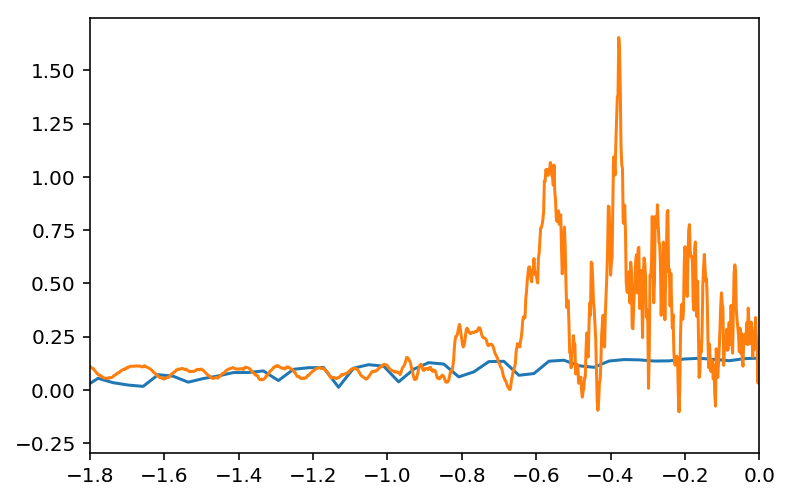

In [28]:
test1 = np.fromfile('/Volumes/platonov/Figures+data//TcompleteList_0.5.txt',dtype=float,count=-1, sep=" ")
test2 = np.fromfile('/Volumes/platonov/Figures+data//TcompleteList_4th.txt',dtype=float,count=-1, sep=" ")
#test1 = np.reshape(test1, (251, 1001))
#test1=np.transpose(test1)
x22=np.linspace(-0, -4, num=100)
#plt.plot(x22,test1*1E-3)
plt.xlim(-1.8,0)
plt.plot(x22,test2*0.1-17.4)
plt.plot(x2,(exp1[62]+exp1[61]+exp1[60]+exp1[59]+exp1[58])/5*1E9+0.05)

In [38]:
test2.shape

(251,)

In [31]:
test=np.linspace(0, 0, num=1001)
test2=np.linspace(0, 0, num=251)
test3=np.linspace(0, 0, num=251)
test4=np.linspace(0, 0, num=251)
for i in range(0,251):
    test=test+exp1[i]
for j in range(0,400):
    test2=test2+exp1[:,j]
for j in range(200,400):
    test3=test3+exp1[:,j]
for j in range(400,600):
    test4=test4+exp1[:,j]
    

In [ ]:
x=np.linspace(-2., -0.8, num=251)
x2=np.linspace(-2, 0, num=1001)
x3=np.linspace(-2, 0, num=1001)
x4=np.linspace(-1.8, -0.8, num=201)
x5=np.linspace(-1.76, -0.8, num=201)
#plt.plot(x2,test/251)
#plt.ylim(0)
plt.plot(x,test2/400)
#plt.plot(x,test3)
#plt.plot(x,test4)
plt.xlim(-1.8,-0.8)
plt.axvline(x=-1.7, color='k', linestyle='dotted',lw=0.4)
plt.axvline(x=-1.6, color='k', linestyle='dotted',lw=0.4)
plt.axvline(x=-1.5, color='k', linestyle='dotted',lw=0.4)
plt.axvline(x=-1.4, color='k', linestyle='dotted',lw=0.4)
plt.axvline(x=-1.3, color='k', linestyle='dotted',lw=0.4)
plt.axvline(x=-1.21, color='k', linestyle='dotted',lw=0.4)
plt.axvline(x=-1.14, color='k', linestyle='dotted',lw=0.4)
plt.axvline(x=-1.07, color='k', linestyle='dotted',lw=0.4)
plt.axvline(x=-1.0, color='k', linestyle='dotted',lw=0.4)

plt.savefig('D:\\test2.pdf',bbox_inches='tight', format='pdf',dpi=900)

In [ ]:
x2[400]

In [ ]:
xy=np.linspace(-2, -1, num=500)
n = xy.size
timestep = xy[2]-xy[1]
xx = np.fft.fftfreq(n, d=timestep)


In [ ]:


y1 = abs(scipy.fft(exp1[70:220,220]))
xy=np.linspace(-1.6, -0.94, num=150)
#y2 = abs(scipy.fft(exp1[95,0:500]))
#y3 = abs(scipy.fft(exp1[105,0:500]))
n = xy.size
timestep = xy[2]-xy[1]
xx = np.fft.fftfreq(n, d=timestep)
plt.xlim(0,100)
plt.plot(xx,y1*0.0079*1E12/1000,'-',color='r')

In [ ]:
x6[70]

In [ ]:
plt.plot(x6,exp1[:,175]*1E9,'k')
plt.plot(x6,exp1[:,220]*1E9+0.1,'gray')

In [ ]:
plt.plot(exp4[0],exp4[1]*1E9/9,'k')
plt.axhline(1)
plt.axhline(2)
plt.axhline(3)
plt.axhline(4)
plt.axhline(5)
plt.ylim(0,7)

(-0.8, -1.8)

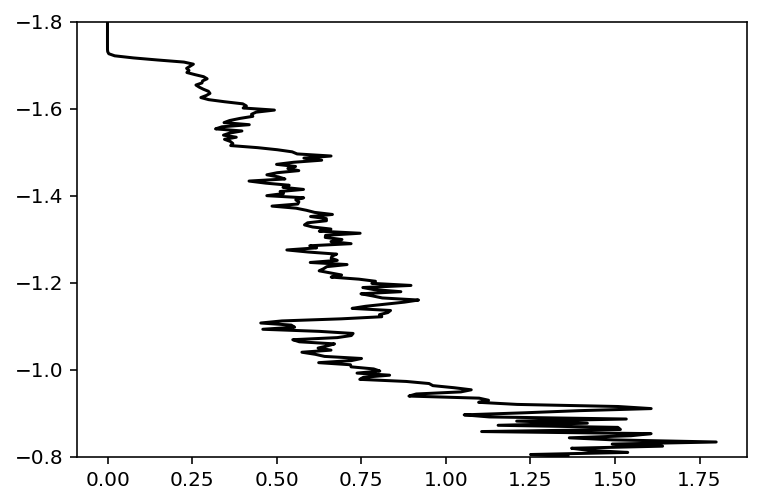

In [7]:
x=np.linspace(-2., -0.8, num=251)
plt.plot(exp1[:,20]*1E9,x,'k')
plt.ylim(-0.8,-1.8)

In [8]:
x=np.linspace(-2., -0.8, num=221)
x2=np.linspace(-2, 0, num=501)
x3=np.linspace(-2, 0, num=501)
x4=np.linspace(-1.8, -0.8, num=201)
x5=np.linspace(-1.76, -0.8, num=201)
x6=np.linspace(-2., -0.8, num=221)

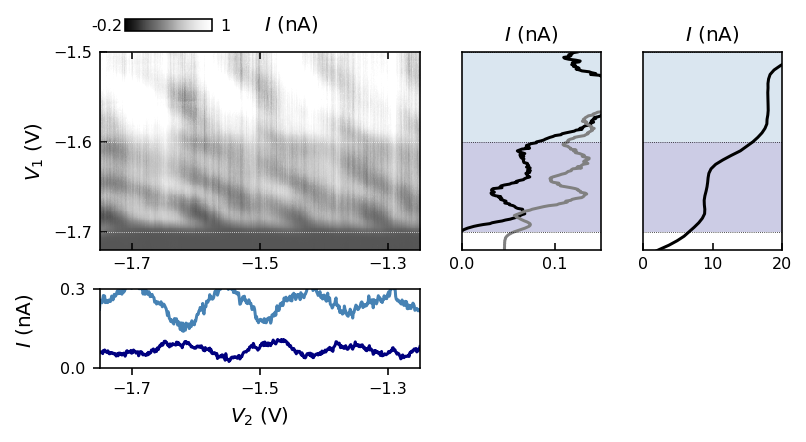

In [9]:
import matplotlib.gridspec as gridspec
#plt.rc('font', family='serif')


fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs[0:2, 0:2])

xt=np.linspace(-2.0, -0.0, num=4)

cf=plt.imshow(exp8*1E9, interpolation='none', aspect='auto',cmap='Greys_r',vmin=-0.2, vmax=0.5, extent=[-1.75,-1.25,-1.5,-1.72])




from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)

#plt.text(-0.8, -1.1, 'No cavity', rotation=90,fontsize=8)
#plt.text(-1.8,-1.48, 'Determenistic cavity', rotation=0,fontsize=8)
#plt.text(-1.3,-1.1, 'Chaotic cavity', rotation=0,fontsize=8)

plt.axhline(y=-1.7, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.6, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.4, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.3, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.21, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.14, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.07, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.0, color='w', linestyle='dotted',lw=0.4)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)


x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


#coefficients = numpy.polyfit(x, y, 3)
#polynomial = numpy.poly1d(coefficients)
#xs=np.linspace(-1.53,-1.15,4000)
#ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.5,-1.6,-1.7],fontsize=8)
plt.xticks([-1.1,-1.3,-1.5,-1.7],fontsize=8)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=10)
#plt.xticks(np.arange(xt.min(), xt.max(),0.6),fontsize=8)
#plt.xlabel("$V_{2}$ (V)", color='k',fontsize=12)
plt.xlim(-1.75,-1.25)
plt.ylim(-1.72,-1.50)
#plt.title('Concave lense at 1st plateau') 

###########################################################
#COLORBAR

cbaxes = fig.add_axes([0.03, 0.917, 0.1, 0.02]) 

plt.text(-0.4, 0, '-0.2',color='k', rotation=0,fontsize=8)
plt.text(1.1, 0, '1',color='k', rotation=0,fontsize=8)
plt.text(1.6, 0, '$I$ (nA)',color='k', rotation=0,fontsize=10)
cbar=plt.colorbar(cax=cbaxes, ticks=[], orientation='horizontal',label='')
#cb=plt.colorbar(ticks=[0, 0.3, 0.7],label='I', orientation='horizontal') 
#plt.colorbar()
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
#cb.ax.xaxis.set_ticks_position('top')
#cb.ax.xaxis.set_label_position('top')
 
#############################################################
import matplotlib.patches as patches
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.72), 6, 0.1,
#        alpha=0.2, facecolor="#000080"
#    ))
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.62), 6, 0.1,
#        alpha=0.2,facecolor="#4682B4"
#    ))
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.52), 6, 0.1,
#        alpha=0.2, facecolor="#00BFFF"
#    ))


ax2 = plt.subplot(gs[2,0:2])
x2=np.linspace(-1.75, -1.25, num=501)
plt.plot(x2,exp8[175]*1E9/3+0.1, '#4682B4')
plt.plot(x2,exp8[65]*1E9/3, '#000080')
#plt.plot(x2,exp8[105]*1E9+0.4, '#00BFFF')
plt.xlim(-1.75,-1.25)
xt=np.linspace(-1.75, -1.25, num=4)
plt.xticks([-1.3,-1.5,-1.7],fontsize=8)
#plt.annotate('3rd', xy=(-1.8,0.7), xytext=(-0.6,0.5), color='#00BFFF',fontsize=8)

#plt.annotate('2nd', xy=(-1.8,0.7), xytext=(-0.6,0.25),color='#4682B4',fontsize=8)
#plt.annotate('1st', xy=(-1.8,0.7), xytext=(-0.6,0.),color='#000080',fontsize=8)
#plt.annotate('$\overline{I}$', xy=(-1.5,0.6), xytext=(-1.5,0.),color='k',arrowprops=dict(arrowstyle="<->",
#                            connectionstyle="arc3"))
plt.xlabel("$V_{2}$ (V)",color='k',fontsize=10)

plt.ylabel("$I$ (nA)", x=0,fontsize=10)
ax = plt.gca() 
ax.yaxis.set_label_coords(-0.2, 0.6) 
#plt.xlim(0,550)
plt.ylim(0,0.3)
yt=np.linspace(0, 0.5, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),0.3),fontsize=8)
#xf=np.linspace(-0.8, -1.8, num=300)
#plt.plot(xf,exp7[0],'-',lw=5)
ax2.add_patch(patches.Rectangle(
        (-2, -1.72), 600, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax2.add_patch(patches.Rectangle(
        (-2, -1.62), 600, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax2.add_patch(patches.Rectangle(
        (-2, -1.52), 600, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))

#ax3 = plt.subplot(gs[0:2:, 3])


#plt.plot(exp3*0.0079*1000,x5,'k')

#plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.4)
#plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.4)
#plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
#xt=np.linspace(20, 200, num=4)
#plt.xticks(np.arange(xt.min(), xt.max(),80),fontsize=6)
#plt.title('$A$ (pA)', color='black',fontsize=8)
#plt.text(85, -1.3, '(4)',color='k', rotation=0,fontsize=8)
#plt.xlabel("$V_2$ (V)")
#plt.xlabel("$I$ (nA)")
#plt.ylim(-1.8,-0.8)
#plt.xlim(0,120)



ax4 = plt.subplot(gs[0:2:, 3])

plt.plot(exp4[1]*1E9,exp4[0],'k')
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
xt=np.linspace(0, 70, num=4)
plt.title('$I$ (nA)', color='black',fontsize=10)

plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.4)
plt.xticks(np.arange(xt.min(), xt.max(),10),fontsize=8)
#plt.annotate('1st', xy=(2,-1.72), xytext=(2.1,-1.70),color='black')
#plt.annotate('2nd', xy=(2,-1.62), xytext=(2.1,-1.59),color='blue')
#plt.annotate('3rd', xy=(2,-1.52), xytext=(2.1,-1.48),color='red')
plt.xlim(0,2E1)
plt.ylim(-1.72, -1.5)
ax4.add_patch(patches.Rectangle(
        (-2, -1.7), 600, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.6), 600, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.5), 600, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))




ax4 = plt.subplot(gs[0:2:, 2])


x6=np.linspace(-1.72, -1.5, num=221)
plt.plot(exp8[:,200]*1E9/3,x6,'k')
plt.plot(exp8[:,160]*1E9/3+0.05,x6,'gray')
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
xt=np.linspace(0, 0.3, num=4)
#plt.text(1, -0.95, '(2)',color='k', rotation=0,fontsize=8)
plt.title('$I$ (nA)', color='black',fontsize=10)
plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.4)
plt.xticks(np.arange(xt.min(), xt.max(),0.1),fontsize=8)

# P.arrow( x, y, dx, dy, **kwargs )


#plt.annotate('1st', xy=(2,-1.72), xytext=(2,-1.72),color='#000080',fontsize=8)
#plt.annotate('2nd', xy=(2,-1.62), xytext=(2,-1.61),color='#4682B4',fontsize=8)
#plt.annotate('3rd', xy=(2,-1.52), xytext=(2,-1.5),color='#00BFFF',fontsize=8)

#plt.xlabel("$V_2$ (V)")
#plt.xlabel("$I$ (nA)")
plt.xlim(-0.0,0.15)
plt.ylim(-1.72, -1.5)

ax4.add_patch(patches.Rectangle(
        (-2, -1.7), 600, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.6), 600, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.5), 600, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))


plt.savefig('D:\\1d.png',bbox_inches='tight', format='png',dpi=900)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:49: RankWarning: Polyfit may be poorly conditioned


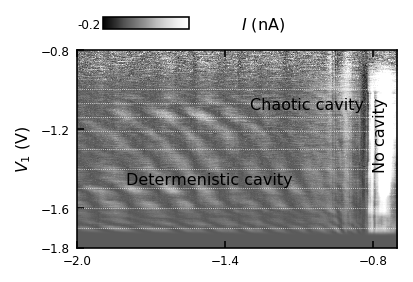

In [30]:
import matplotlib.gridspec as gridspec
#plt.rc('font', family='serif')


fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs[0:2, 0:2])

xt=np.linspace(-2.0, -0.0, num=4)

cf=plt.imshow(exp1*1E9, interpolation='none', aspect='auto',cmap='Greys_r',vmin=-0.2, vmax=0.5, extent=[-2.0,0,-.800,-2.000])




from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)
plt.text(-0.8, -1.1, 'No cavity', rotation=90,fontsize=8)
plt.text(-1.8,-1.48, 'Determenistic cavity', rotation=0,fontsize=8)
plt.text(-1.3,-1.1, 'Chaotic cavity', rotation=0,fontsize=8)
#plt.annotate('Determenistic cavity',color='k', xy=(-10,-10), xytext=(-1.8,-1.3),
            # arrowprops=dict(width=0, headwidth=0, facecolor='k',shrink=0.1),fontsize=8 )
#plt.annotate('Chaotic cavity',color='k', xy=(-10,-10), xytext=(-1.3,-1.0), 
            # arrowprops=dict(width=0, headwidth=0, facecolor='k',shrink=0.1),fontsize=8 ) 
plt.axhline(y=-1.7, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.6, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.4, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.3, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.21, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.14, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.07, color='w', linestyle='dotted',lw=0.4)
plt.axhline(y=-1.0, color='w', linestyle='dotted',lw=0.4)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)

x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


coefficients = numpy.polyfit(x, y, 3)
polynomial = numpy.poly1d(coefficients)
xs=np.linspace(-1.53,-1.15,4000)
ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.2,-1.6,-1.8],fontsize=6)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=8)
plt.xticks(np.arange(xt.min(), xt.max(),0.6),fontsize=6)
plt.ylim(-1.8,-0.8)
plt.xlim(-2,-0.7)
#plt.title('Concave lense at 1st plateau') 

###########################################################
#COLORBAR

cbaxes = fig.add_axes([0.03, 0.917, 0.1, 0.02]) 

plt.text(-0.3, 0, '-0.2',color='k', rotation=0,fontsize=6)
#plt.text(1.1, 0, '3',color='k', rotation=0,fontsize=6)
plt.text(1.6, 0, '$I$ (nA)',color='k', rotation=0,fontsize=8)
cbar=plt.colorbar(cax=cbaxes, ticks=[], orientation='horizontal',label='')
#cb=plt.colorbar(ticks=[0, 0.3, 0.7],label='I', orientation='horizontal') 
#plt.colorbar()
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
#cb.ax.xaxis.set_ticks_position('top')
#cb.ax.xaxis.set_label_position('top')
 
#############################################################
import matplotlib.patches as patches
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.72), 6, 0.1,
#        alpha=0.2, facecolor="#000080"
#    ))
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.62), 6, 0.1,
#        alpha=0.2,facecolor="#4682B4"
#    ))
#ax1.add_patch(patches.Rectangle(
#        (-2, -1.52), 6, 0.1,
#        alpha=0.2, facecolor="#00BFFF"
#    ))
plt.savefig('D:\\1d.png',bbox_inches='tight', format='png',dpi=900)

In [11]:
exp1[:,100].shape

(251,)

NameError: name 'axins' is not defined

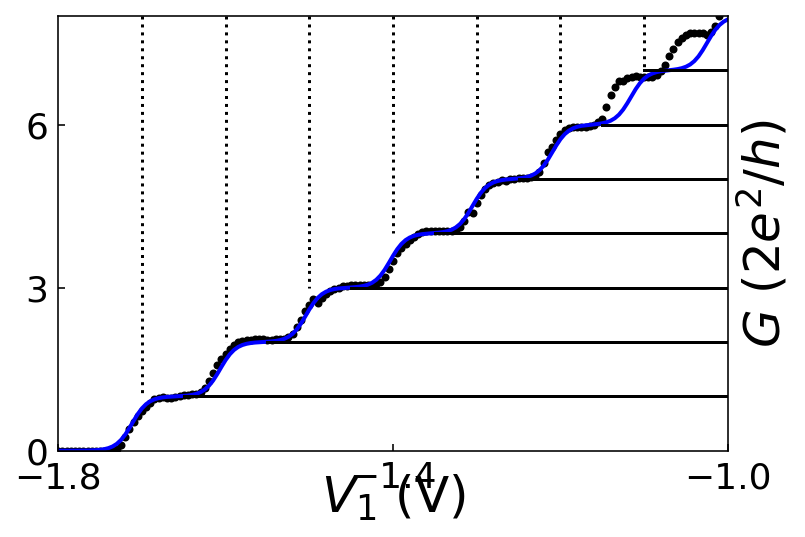

In [12]:
matplotlib.rcParams['svg.fonttype'] = 'none'
#Create a new figure with a default plot
fig, ax = plt.subplots() 


fig2=ax.plot(exp4[0],(5*(0.0006/(exp4[1])-6*320)**(-1))/7.7480917346E-5,'ok',ms=3)

E=np.linspace(0,20, num=241)
T=np.linspace(0,0, num=201)
#n=np.linspace(0,10, num=11)
a=16.9176738
b=1.8
c=1.765
e=0.04
d=0
for i in range(0,20):
    En=2*(a*(exp4[0,200:441]+c)-b*(i+1/2))
    T=T+1/(1+np.exp(-np.pi*(En+d*i+e*i*i)))
fig2=ax.plot(exp4[0,200:441],T,color='blue',lw=2)

plt.ylabel('$G$ ($2e^2/h$)', color='black', fontsize=25,
           horizontalalignment='right', position=(0,0.5))
plt.xlabel('$V_1$ (V)', color='k', fontsize=25,position=(0.5,-1))
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_coords(0.5, -0.05)
#xt2=np.linspace(-2, -0.8, num=4)
plt.xticks([-1.8,-1.4,-1], fontsize = 18)
ax.tick_params(direction='in', pad=5)
yt2=np.linspace(-0, 8, num=4)
plt.yticks(np.arange(yt2.min(), yt2.max(),3),fontsize = 18)
ax.set_xlim(-1.8, -1) # apply the x-limits
ax.set_ylim(-0.001, 8) # apply the y-limits
plt.plot([0,-1.65],[1,1],'k')
plt.plot([0,-1.55],[2,2],'k')
plt.plot([0,-1.45],[3,3],'k')
plt.plot([0,-1.35],[4,4],'k')
plt.plot([0,-1.25],[5,5],'k')
plt.plot([0,-1.15],[6,6],'k')
plt.plot([0,-1.10],[7,7],'k')

plt.plot([-1.7,-1.7],[8,1],'k',linestyle='dotted')
plt.plot([-1.6,-1.6],[8,2],'k',linestyle='dotted')
plt.plot([-1.5,-1.5],[8,3],'k',linestyle='dotted')
plt.plot([-1.4,-1.4],[8,4],'k',linestyle='dotted')
plt.plot([-1.3,-1.3],[8,5],'k',linestyle='dotted')
plt.plot([-1.2,-1.2],[8,6],'k',linestyle='dotted')
plt.plot([-1.1,-1.1],[8,7],'k',linestyle='dotted')
#plt.plot([0,-1.65],[8,8],'k')
#plt.axhline(y=1, color='k', ,lw=0.5)
axins.tick_params(direction='in')
#plt.yticks(visible=False)
#plt.xticks(visible=False)
axins2 = inset_axes(ax,width=2., 
                   height=2., loc=2)
axins2.axis('off')
axins2.set_xlim(-1.8, -1) # apply the x-limits
axins2.set_ylim(-1, 70) # apply the y-limits




#Create zoomed in plot

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

axins = inset_axes(ax,width=1.5, 
                   height=1.0, loc=2)
axins.tick_params(labeltop=False, labelbottom=True, bottom=True, top=False, 
                labelright=True,right=True,left=False, labelleft=False)

axins.plot(exp4[0], exp4[1]*1E9,color='black',lw=2)
xt=np.linspace(0, 70, num=4)
plt.ylabel('$I$ (nA)', color='black', fontsize=25)
plt.xlabel('$V_1$ (V)', color='k', fontsize=25)
plt.ylim(-3,400)
plt.xticks( fontsize = 18)
plt.yticks( fontsize = 18)
yt2=np.linspace(0, 500, num=4)
plt.yticks(np.arange(yt2.min(), yt2.max(),200))
#plt.text(-0.78, 378, '$V_{sd}=-0.6$ mV', rotation=0, fontsize=15)
#plt.text(-0.78, 300, '$n=Gh/2e^2=1,2..$', rotation=0, fontsize=15)
xt2=np.linspace(-2, 0.2, num=4)
plt.xticks(np.arange(xt2.min(), xt2.max(),1))


from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins2, loc1=4, loc2=3, fc="none", ec="0.5")

plt.savefig('D:\\test\\test.pdf',bbox_inches='tight', format='pdf')

import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data

im = plt.imread(get_sample_data('D:\\sample.png'))


# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.
newax = fig.add_axes([0.43, 0.15, 0.45, 0.45], anchor='NE', zorder=1)
#newax.imshow(im)
newax.axis('off')

plt.savefig('D:\\test\\test.pdf',bbox_inches='tight', format='pdf',dpi = 1000)

In [ ]:
plt.imshow(im)

In [ ]:
cf=plt.imshow(exp1*1E9, interpolation='none', aspect='auto',cmap='Greys_r',vmin=-0.2, vmax=0.5, extent=[-2.0,0,-.800,-2.000])